In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [40]:
cancer = load_breast_cancer()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42,
)

In [42]:
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
logreg.score(X_train, y_train)

0.9577464788732394

In [43]:
logreg.score(X_test, y_test)

0.958041958041958

In [44]:
# similar scores is a good chance we are underfitting
logreg100 = LogisticRegression(max_iter=100000, C=100).fit(X_train, y_train)
logreg100.score(X_train, y_train)

0.9788732394366197

In [45]:
logreg100.score(X_test, y_test)

0.965034965034965

In [46]:
logreg001 = LogisticRegression(max_iter=100000, C=0.01).fit(X_train, y_train)
logreg001.score(X_train, y_train)

0.9530516431924883

In [47]:
logreg001.score(X_test, y_test)

0.951048951048951

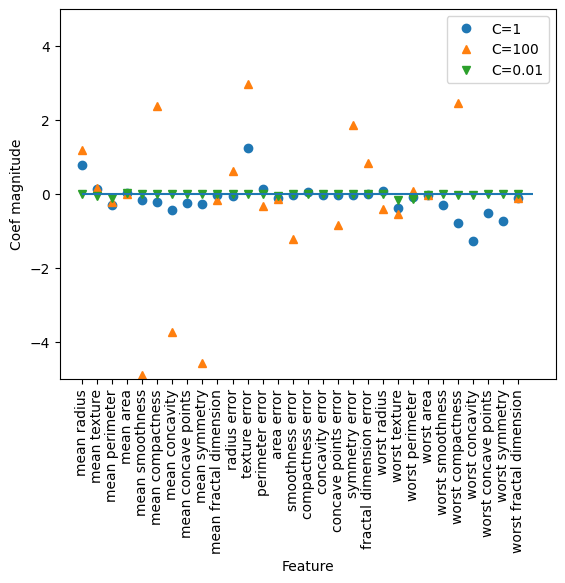

In [58]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coef magnitude")
plt.legend()
plt.show()


===
0.9131455399061033
0.9230769230769231

===
0.960093896713615
0.958041958041958

===
0.9859154929577465
0.9790209790209791


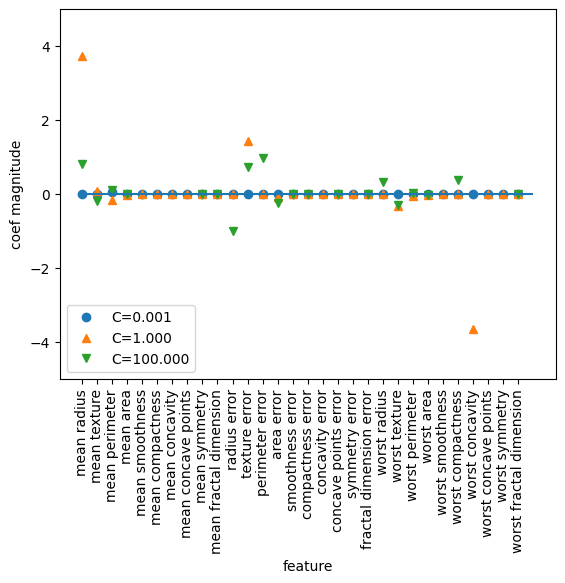

In [59]:
# using L1 regularization
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(max_iter=100000,C=C, solver='liblinear', penalty="l1").fit(X_train,y_train)
    print("\n===")
    print(lr_l1.score(X_train, y_train))
    print(lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()